<a href="https://colab.research.google.com/github/sonjoy1s/ML/blob/main/Module_22_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Module 22: XGBoost  
## XGBoost Training, Prediction, Implementation, Evaluation & Use Cases



## 22.3 XGBoost Training, Prediction & Key Parameters

### How XGBoost Training Works (Big Picture)

XGBoost training follows a disciplined correction loop:

1. Start with an initial prediction (base score)
2. Compute gradients and hessians
3. Build a tree that minimizes the objective
4. Compute optimal leaf weights
5. Update predictions using learning rate
6. Repeat until performance stops improving

> Key idea: **Each tree is weak on purpose. Strength comes from many controlled corrections.**



### XGBoost Prediction Formula

The final prediction is:

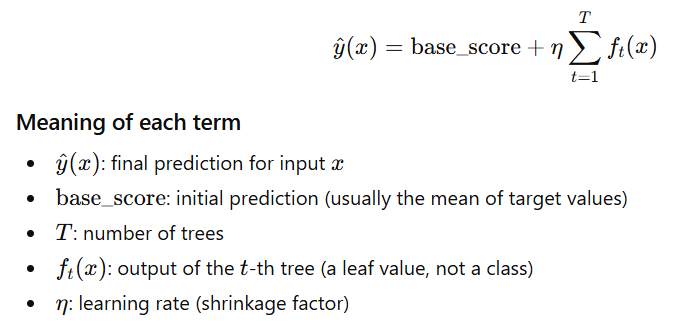\[


> Prediction is the **sum of all trees**, not the last tree.



### Key Parameters You Must Understand

#### Core Structure
- `n_estimators`: number of trees  
- `max_depth`: depth of each tree  
- `learning_rate (eta)`: step size of updates  

Golden rule:
> High depth + high learning rate = overfitting speedrun



#### Regularization Parameters (XGBoost Superpower)

- `gamma`: minimum gain required for a split
- `reg_lambda`: L2 penalty on leaf weights
- `reg_alpha`: L1 penalty (sparsity)

These prevent XGBoost from memorizing noise.



#### Sampling Parameters

- `subsample`: fraction of rows used per tree
- `colsample_bytree`: fraction of features used per tree

> Sampling intentionally hides data to reduce overfitting.



#### Objective Function

Examples:
- `reg:squarederror` → regression
- `binary:logistic` → binary classification
- `multi:softprob` → multiclass classification

> Wrong objective = wrong math = useless model



## 22.4 Implementing XGBoost on a Dataset

We will use a **binary classification dataset** so evaluation concepts are meaningful.


In [ ]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from xgboost import XGBClassifier


### Load Dataset

This dataset predicts whether a tumor is:
- 0 = malignant
- 1 = benign


In [ ]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)


### Train-Test Split

We use stratification to preserve class balance.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


### Train a Baseline XGBoost Model

This is a **sane default**, not hyperparameter tuning.


In [ ]:
#Deafult XGBoost Model
model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)


### Prediction

- `predict` gives class labels  
- `predict_proba` gives confidence scores


In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


## 22.5 Model Evaluation, Model Selection & Practical Use Cases



### Evaluation Metrics

Accuracy alone is dangerous. Always inspect precision and recall.


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114




### Confusion Matrix

Interpret errors, not just numbers.


In [ ]:
confusion_matrix(y_test, y_pred)

array([[38,  4],
       [ 2, 70]])


### Early Stopping (Overfitting Control)

Early stopping halts training when validation performance stops improving.


In [ ]:
#Early Stopping (Overfitting Control)
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

params = {
    "objetive": "binary:logistic",
    "eval_metric": "logloss",
    "max_depth": 3,
    "eta": 0.05,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42
}

modelr = xgb.train(
    params = params,
    dtrain=dtrain,
    num_boost_round=500,
    evals=[(dtest,"eval")],
    early_stopping_rounds=20
)

[0]	eval-logloss:0.61902
[1]	eval-logloss:0.58253
[2]	eval-logloss:0.55059
[3]	eval-logloss:0.51940
[4]	eval-logloss:0.49238
[5]	eval-logloss:0.46803
[6]	eval-logloss:0.44507
[7]	eval-logloss:0.42585
[8]	eval-logloss:0.40668
[9]	eval-logloss:0.38775
[10]	eval-logloss:0.37134
[11]	eval-logloss:0.35543
[12]	eval-logloss:0.33993
[13]	eval-logloss:0.32663
[14]	eval-logloss:0.31447
[15]	eval-logloss:0.30306
[16]	eval-logloss:0.29113
[17]	eval-logloss:0.28078
[18]	eval-logloss:0.27134
[19]	eval-logloss:0.26334
[20]	eval-logloss:0.25478
[21]	eval-logloss:0.24682
[22]	eval-logloss:0.23910
[23]	eval-logloss:0.23112
[24]	eval-logloss:0.22454
[25]	eval-logloss:0.21900
[26]	eval-logloss:0.21245
[27]	eval-logloss:0.20682
[28]	eval-logloss:0.20134
[29]	eval-logloss:0.19624
[30]	eval-logloss:0.19157
[31]	eval-logloss:0.18773
[32]	eval-logloss:0.18332
[33]	eval-logloss:0.17901
[34]	eval-logloss:0.17482
[35]	eval-logloss:0.17194
[36]	eval-logloss:0.16865
[37]	eval-logloss:0.16517
[38]	eval-logloss:0.16

/usr/local/lib/python3.12/dist-packages/xgboost/callback.py:386: UserWarning: [13:35:26] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "objetive" } are not used.

  self.starting_round = model.num_boosted_rounds()


[52]	eval-logloss:0.12967
[53]	eval-logloss:0.12830
[54]	eval-logloss:0.12711
[55]	eval-logloss:0.12607
[56]	eval-logloss:0.12477
[57]	eval-logloss:0.12383
[58]	eval-logloss:0.12251
[59]	eval-logloss:0.12174
[60]	eval-logloss:0.12065
[61]	eval-logloss:0.11983
[62]	eval-logloss:0.11861
[63]	eval-logloss:0.11795
[64]	eval-logloss:0.11694
[65]	eval-logloss:0.11612
[66]	eval-logloss:0.11601
[67]	eval-logloss:0.11527
[68]	eval-logloss:0.11428
[69]	eval-logloss:0.11405
[70]	eval-logloss:0.11307
[71]	eval-logloss:0.11235
[72]	eval-logloss:0.11152
[73]	eval-logloss:0.11094
[74]	eval-logloss:0.11010
[75]	eval-logloss:0.10966
[76]	eval-logloss:0.10940
[77]	eval-logloss:0.10899
[78]	eval-logloss:0.10869
[79]	eval-logloss:0.10822
[80]	eval-logloss:0.10774
[81]	eval-logloss:0.10711
[82]	eval-logloss:0.10702
[83]	eval-logloss:0.10666
[84]	eval-logloss:0.10567
[85]	eval-logloss:0.10520
[86]	eval-logloss:0.10500
[87]	eval-logloss:0.10470
[88]	eval-logloss:0.10468
[89]	eval-logloss:0.10408
[90]	eval-lo

In [ ]:
y_prob = modelr.predict(dtest)

y_pred = (y_prob >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

Accuracy:  0.9473684210526315


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        42
           1       0.96      0.96      0.96        72

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
print("Early Stopping Information: ")
print("Best Iteration:", modelr.best_iteration)
print("Best score [logloss]: ", modelr.best_score)

Early Stopping Information: 
Best Iteration: 198
Best score [logloss]:  0.09472722653503808



### Feature Importance

Importance indicates contribution, not causation.


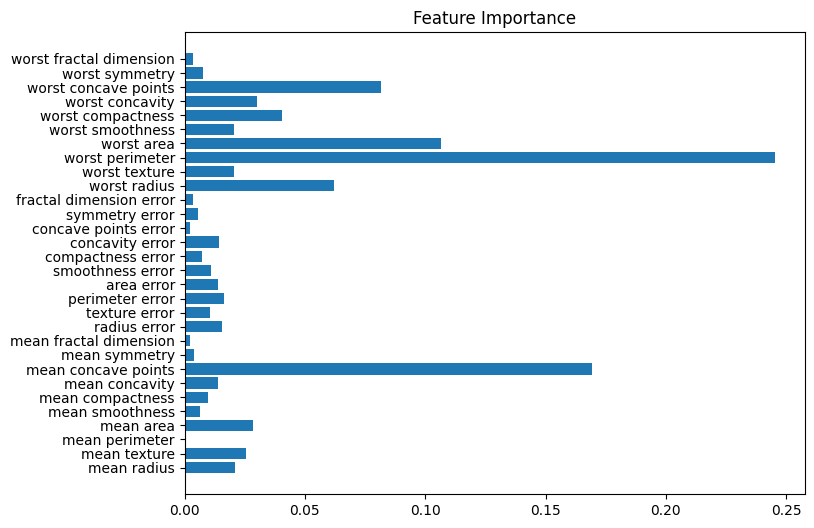

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.barh(X.columns, model.feature_importances_)
plt.title("Feature Importance")
plt.show()


### When to Use XGBoost

**Use XGBoost when:**
- Data is tabular
- Features are mixed
- Strong baseline performance is needed

**Avoid XGBoost when:**
- Dataset is extremely small
- Data is sequential or spatial
- Interpretability is the top priority



### Practical Use Cases

- Finance: credit risk, fraud detection
- Healthcare: structured diagnosis data
- Marketing: churn prediction
- Operations: demand forecasting



## Final Recap

- XGBoost is Gradient Boosting with discipline
- Regularization prevents overfitting
- Second-order optimization stabilizes learning
- Early stopping saves you from bad parameters

> XGBoost does not guess. It **calculates**.



---
## 22.6 Hyperparameter Tuning with GridSearchCV [Optional]

Until now, we used **sane default parameters**.  
In practice, we often want to systematically search for better hyperparameters.

In this section, we will:
- Tune a **small, meaningful set** of XGBoost parameters
- Use **GridSearchCV**
- Discuss *why* each parameter is included in the grid

> Important: Grid search is expensive. We keep the grid small for teaching and sanity.



### Why Not Tune Everything?

Tuning too many parameters at once:
- Explodes computation time
- Makes results hard to interpret
- Encourages blind optimization

Good practice:
> Tune depth, learning rate, number of trees, and sampling first.


In [ ]:
from sklearn.model_selection import GridSearchCV


### Define Parameter Grid

We tune only the most impactful parameters:

- `n_estimators`: number of boosting rounds  
- `max_depth`: tree complexity  
- `learning_rate`: step size  
- `subsample`: row sampling  

This keeps the search interpretable.


In [ ]:
param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5],
    "learning_rate": [0.05, 0.1],
    "subsample": [0.8, 1.0]
}


### Base Model for Grid Search

We keep other parameters fixed so their effects do not mix with the tuned ones.


In [ ]:
xgb_base = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False
)


### Run GridSearchCV

We use:
- 5-fold cross-validation
- Accuracy as scoring metric

Note:
> In real projects, choose metrics based on business impact, not convenience.


In [ ]:
grid = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [13:40:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)


### Best Parameters Found


In [ ]:
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best CV Accuracy: 0.9736263736263737



### Evaluate Tuned Model on Test Set

Always evaluate on **unseen data**.


In [ ]:
best_model = grid.best_estimator_

y_pred_tuned = best_model.predict(X_test)

print("Test Accuracy (Tuned):", accuracy_score(y_test, y_pred_tuned))
print(classification_report(y_test, y_pred_tuned))

Test Accuracy (Tuned): 0.9649122807017544
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        42
           1       0.96      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114




### Important Teaching Takeaways

- Grid search does not replace understanding
- Smaller grids are often better
- Cross-validation reduces luck-based results
- Tuned models can still overfit if evaluation is careless

> Hyperparameter tuning improves models, but **data quality improves them more**.
